In [14]:
import cogsworth
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy.units as u

In [15]:
# this all just makes plots look nice
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)
pd.options.display.max_columns = 999

In [16]:
p = cogsworth.pop.Population(1000)
p.sample_initial_binaries()
p.perform_stellar_evolution()

In [17]:
n_bpp_rows = np.array([len(p.bpp.loc[i]) for i in p.bin_nums])
n_bpp_rows[n_bpp_rows > 30] = 0        # remove the crazy ones
complicated_binary = p.bin_nums[np.argmax(n_bpp_rows)]

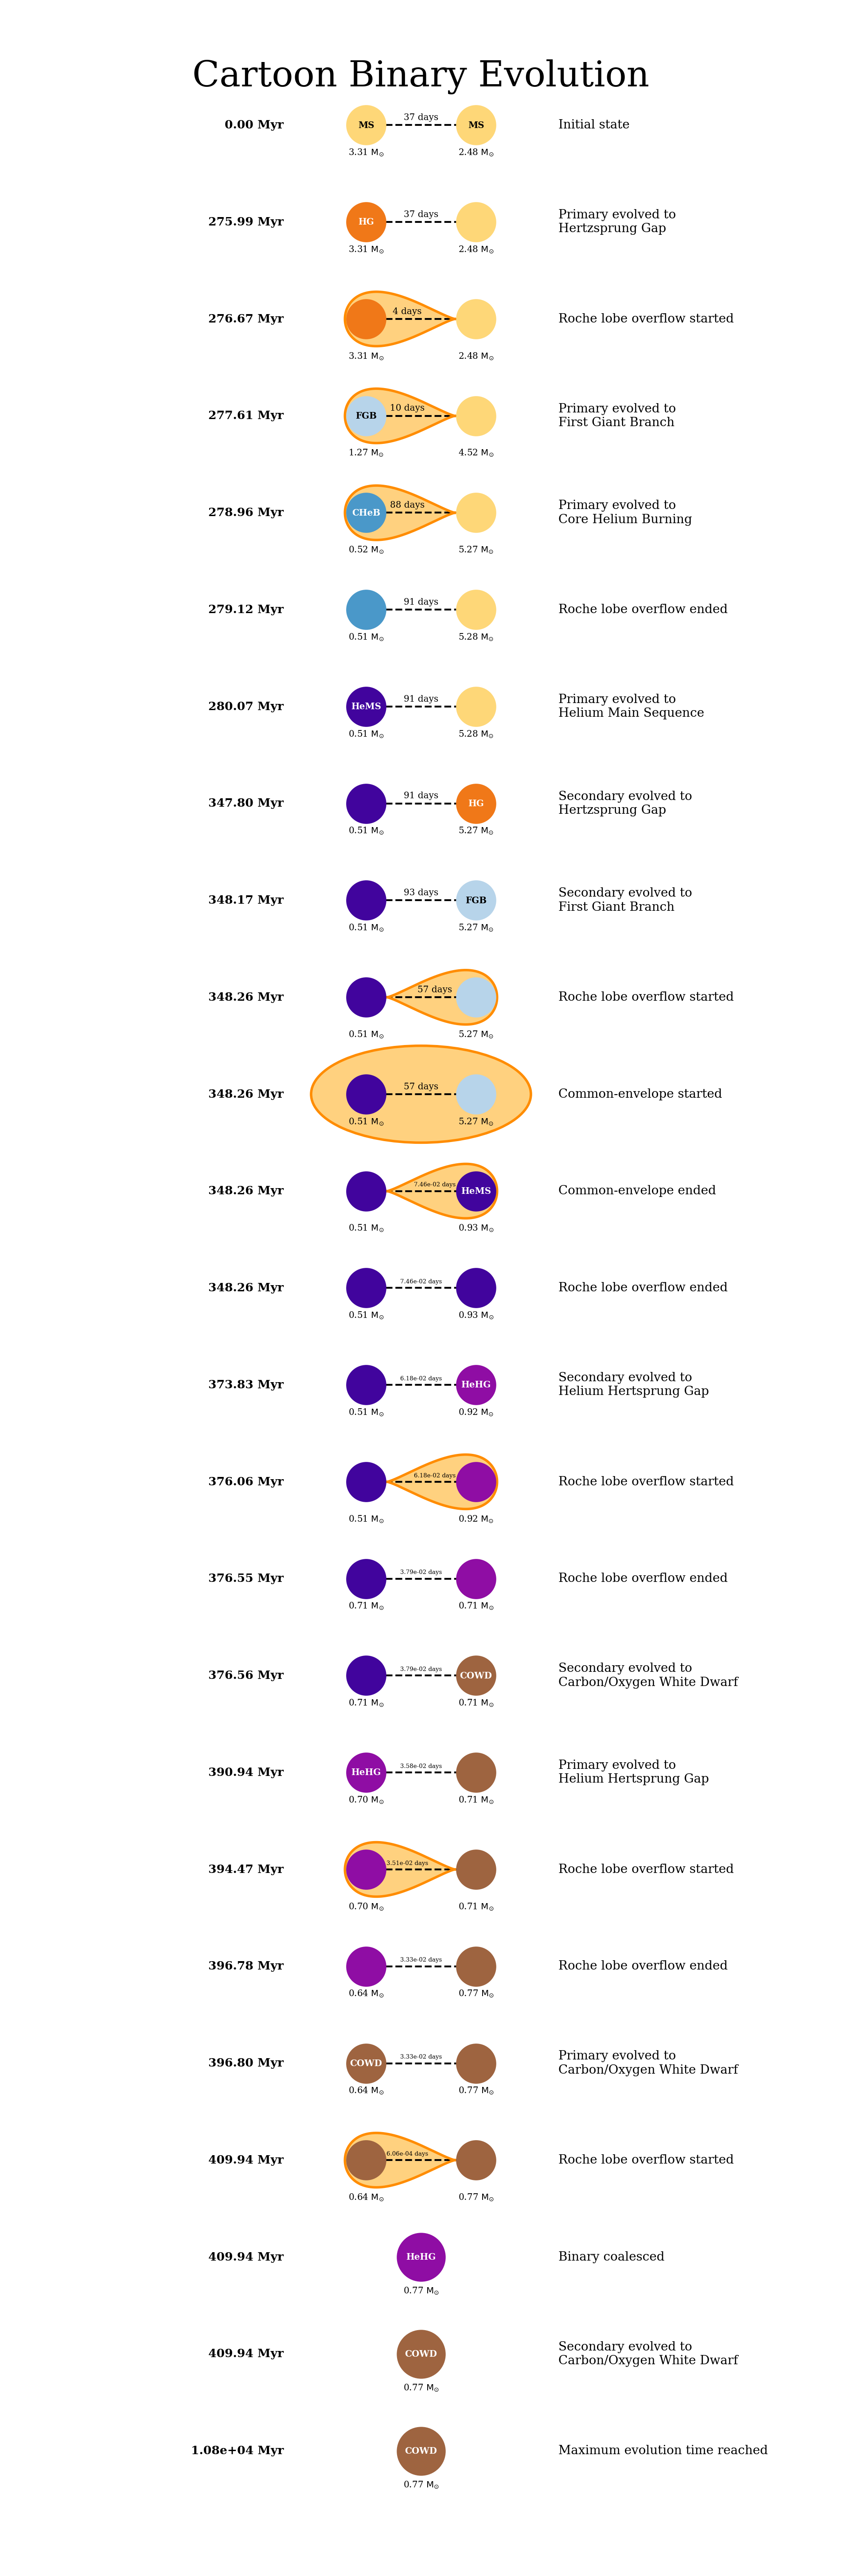

In [18]:
p.plot_cartoon_binary(complicated_binary);

In [19]:
# reduce the population to just the complicated binary
p = p[int(complicated_binary)]

# get the bcm table to contain every timestep
p.bcm_timestep_conditions = [["binstate=0", "dtp=0.0"]]

# re-perform evolution
p.perform_stellar_evolution()

Now ``p.bcm`` contains all of timesteps for our complicated binary and we can use the ``COSMIC`` plotting routine to investigate it.

In [20]:
# import the plotting routine from COSMIC
from cosmic.plotting import plot_binary_evol

# reset plotting style to avoid fontsize issues
plt.style.use("default")

In this case I trim it to only include timesteps within the first 1000 Myr, but you could also apply a lower limit to zoom in on more detail.

/home/tom/miniconda3/envs/cogsworth/lib/python3.10/site-packages/cosmic/plotting.py:609: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  gs.tight_layout(fig)


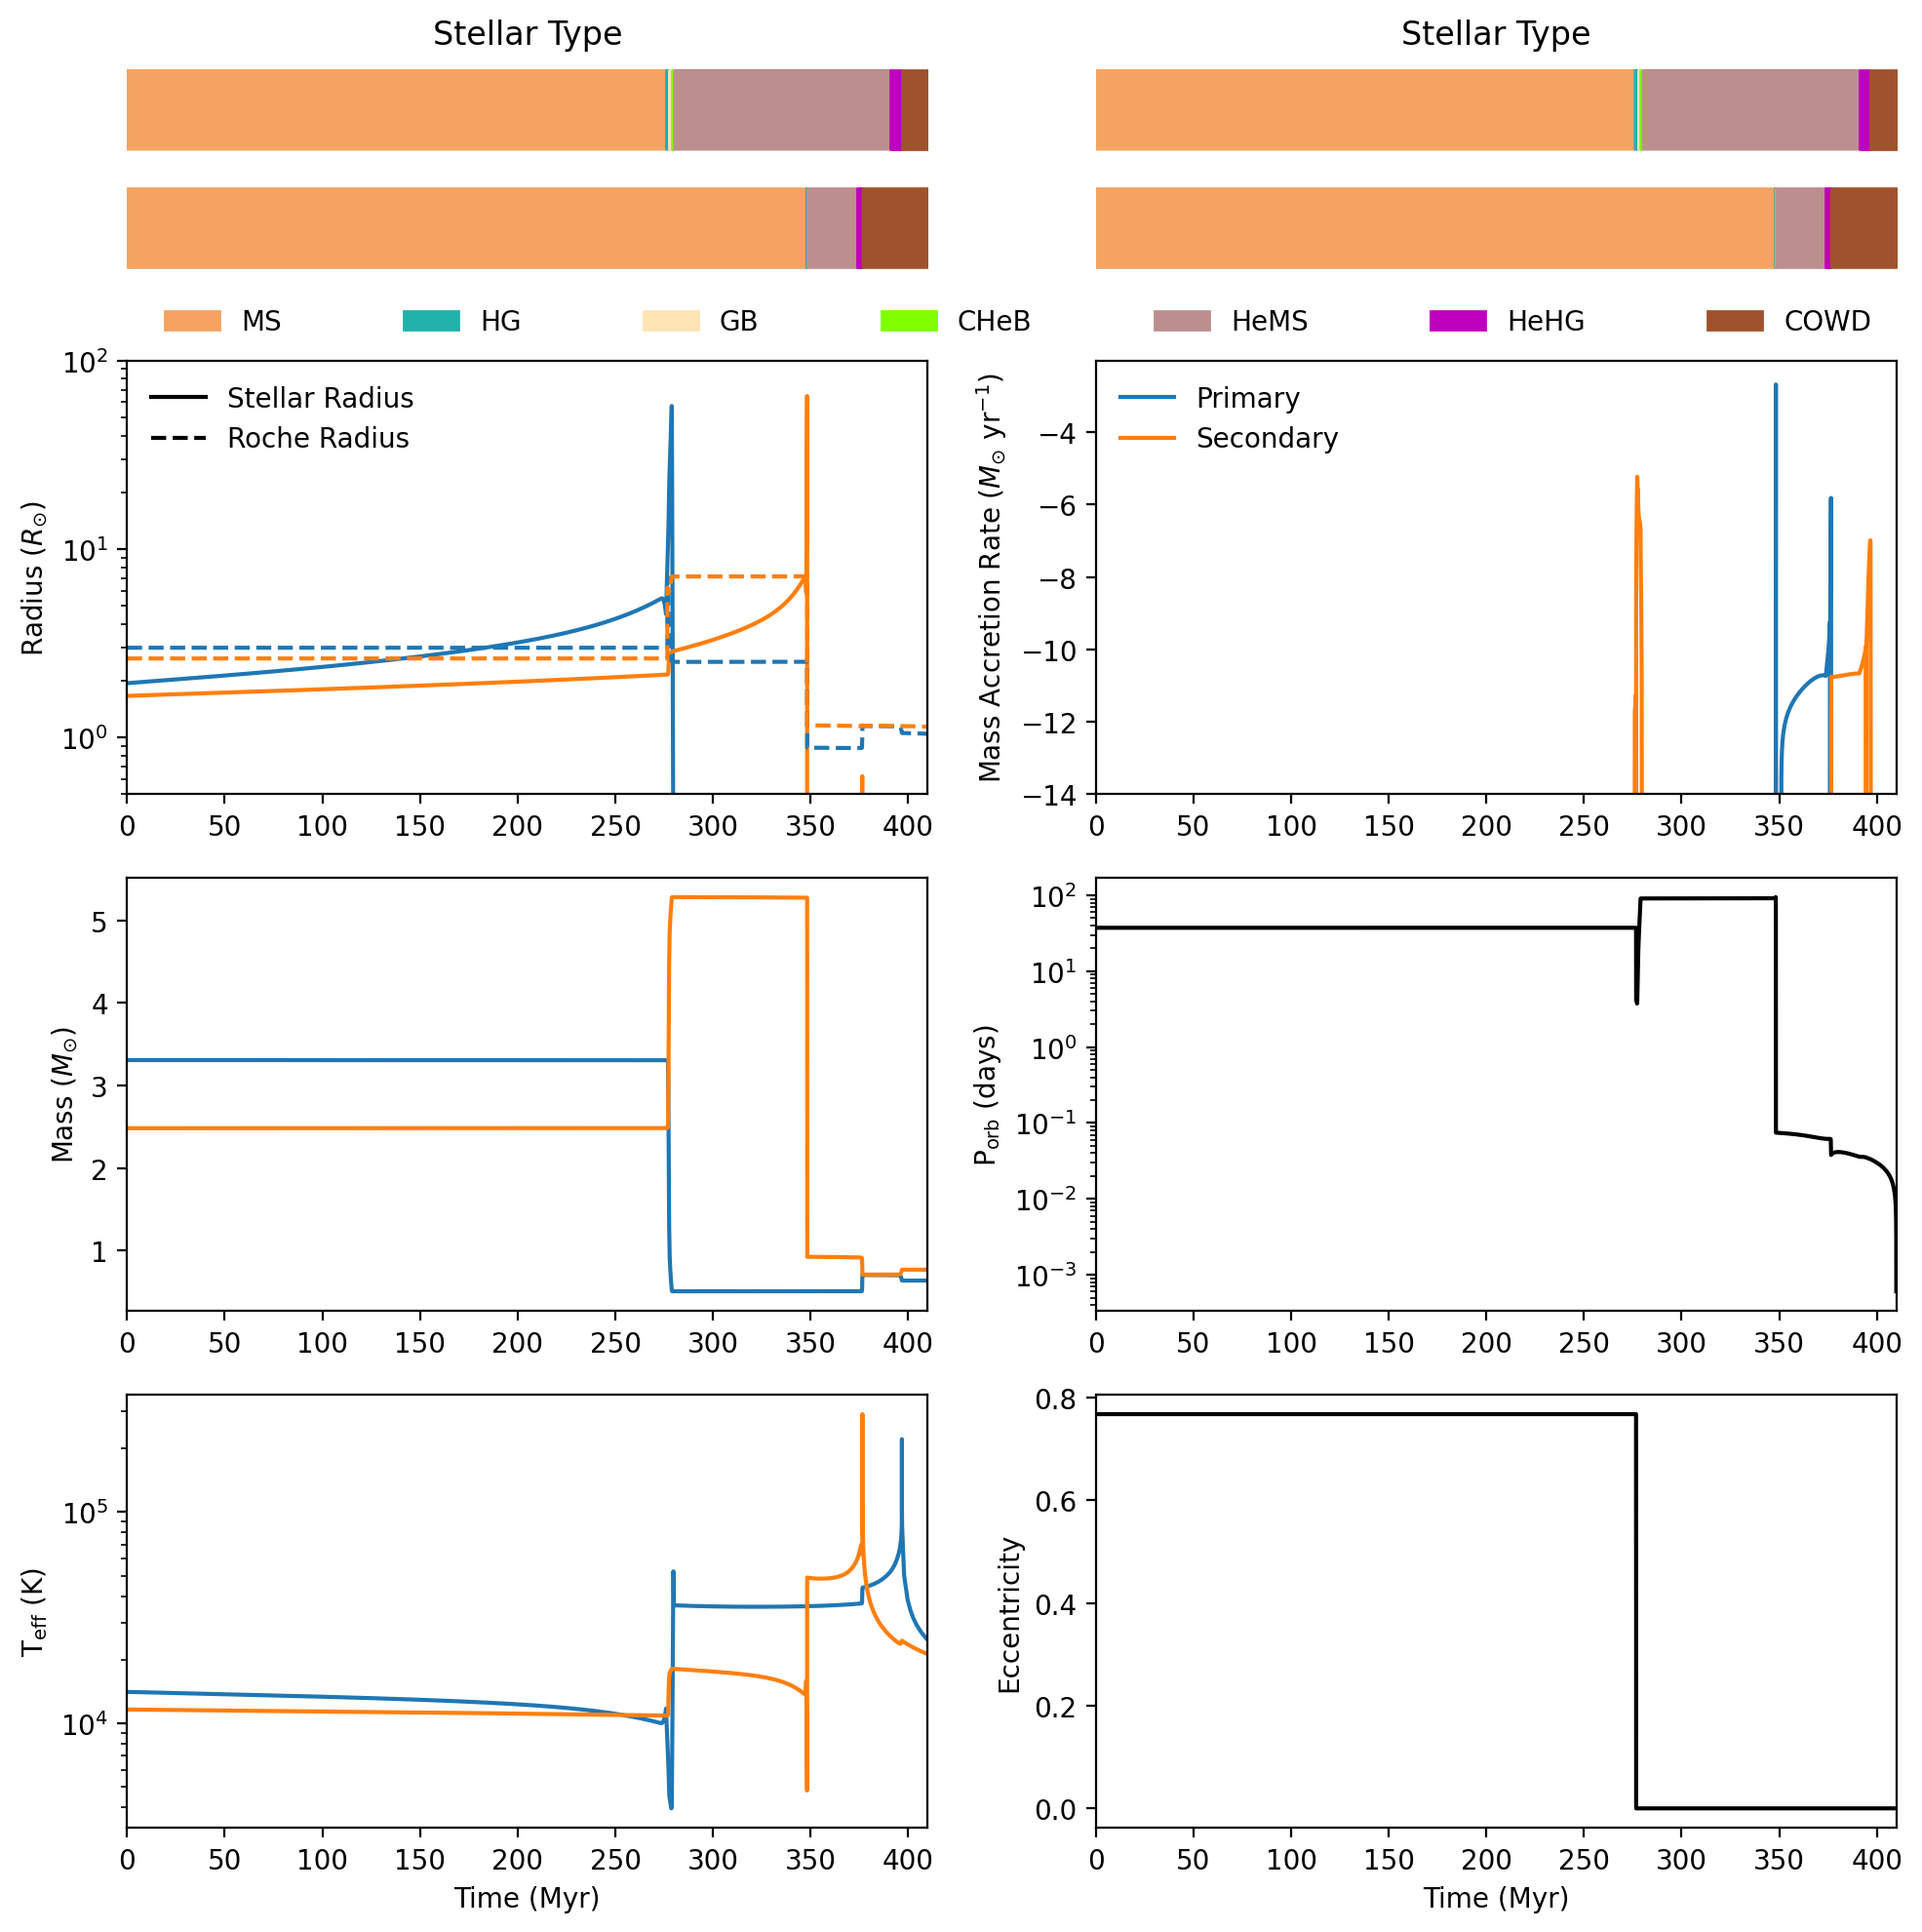

In [22]:
plot_binary_evol(p.bcm[p.bcm["tphys"] < 1000])
plt.show()